In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\Sourav Saha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Sourav Saha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Sourav Saha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Sourav Saha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Sourav Saha\Anaconda3\lib\site-packages\matplotlib\mpl-d

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from scipy import stats
from scipy.stats import norm, skew
from sklearn.svm import SVR

In [24]:
sales_train = pd.read_csv("../datasets/av_big_mart_sales/train.csv")
sales_test = pd.read_csv("../datasets/av_big_mart_sales/test.csv")

In [348]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [349]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
sales = pd.concat([sales_train, sales_test])

In [45]:
sales.reset_index(drop=True, inplace=True)

In [352]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [46]:
n_train = sales_train.shape[0]
n_train

8523

In [354]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [355]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [356]:
sales_test_processed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Unit_Price,Estd_Cat
8523,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,5.198178,2
8524,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,10.520458,3
8525,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,16.558479,2
8526,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,21.193985,3
8527,FDY38,13.703638,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,17.092542,1


In [357]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [358]:
sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [47]:
sales = sales.replace({"Item_Fat_Content" : {"low fat" : "Low Fat", "LF" : "Low Fat", "reg" : "Regular"}})

In [360]:
sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [361]:
sales["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [362]:
sales["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [13]:
sales["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [14]:
sales["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [68]:
sales.loc[sales["Outlet_Size"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Unit_Price,Estd_Cat
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,2
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,5.985963,3
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,9.782365,3
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,3.531231,3
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,7.680776,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,7.381526,2
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,22.071688,3
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,11.874400,3
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,14.027569,3


In [48]:
for record_index, record in sales.iterrows():
    if (pd.isnull(record["Outlet_Size"])):
        if (record["Outlet_Type"] == "Grocery Store"):
            sales.at[record_index, "Outlet_Size"] = "Small"
        else:
            sales.at[record_index, "Outlet_Size"] = "Medium"
        

In [9]:
sales.loc[sales["Outlet_Size"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [147]:
# sales.at[0, "Outlet_Size"] = "Small"

In [92]:
sales.loc[0]

Item_Identifier                          FDA15
Item_Weight                                9.3
Item_Fat_Content                       Low Fat
Item_Visibility                      0.0160473
Item_Type                                Dairy
Item_MRP                               249.809
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      3735.14
Item_Unit_Price                        26.8612
Estd_Cat                                     2
Name: 0, dtype: object

In [15]:
sales["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [16]:
sales["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [17]:
sales["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [99]:
len(sales["Item_Identifier"].unique())

1559

In [24]:
sales_train.corr()["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Unit_Price              0.421661
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [49]:
sales["Item_Unit_Price"] = sales["Item_MRP"] / sales["Item_Weight"]

In [37]:
sales.loc[sales["Item_Weight"].isnull()].index

Int64Index([    7,    18,    21,    23,    29,    36,    38,    39,    49,
               59,
            ...
            14150, 14157, 14163, 14166, 14171, 14178, 14179, 14184, 14188,
            14192],
           dtype='int64', length=2439)

In [39]:
sales.iloc[23]["Item_Weight"]

15.605053997053345

In [22]:
sales.at[23, "Item_Weight"] = 5

In [19]:
sales.ix["Item_Weight"][23] = 5.2

AttributeError: 'DataFrame' object has no attribute 'ix'

In [50]:
sales_with_non_null_wt = sales.drop(sales.loc[sales["Item_Weight"].isnull()].index)

In [51]:
    item_unit_price_series = sales_with_non_null_wt.groupby('Item_Identifier')['Item_Unit_Price'].mean()

In [35]:
item_unit_price_series["FDX07"]

9.548567708333335

In [128]:
# sales.iloc[0]["Item_Identifier"]

'FDA15'

In [52]:
#set item weight and unit price for empty records
weight_list = []
for index_record, record in sales.iterrows():
    if(pd.isnull(record["Item_Weight"])):
        item_unit_price = item_unit_price_series[sales.iloc[index_record]["Item_Identifier"]]
        item_weight = record["Item_MRP"] / item_unit_price
#         print (item_weight)
        weight_list.append(item_weight)
        sales.at[index_record, "Item_Unit_Price"] = item_unit_price
    else:
        weight_list.append(record["Item_Weight"])

In [53]:
sales["Item_Weight"] = weight_list

In [54]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Unit_Price                 0
dtype: int64

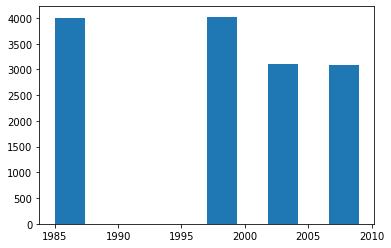

In [27]:
(n, bins, patches) = plt.hist(sales["Outlet_Establishment_Year"])

In [28]:
print (n, bins, patches)

[3992.    0.    0.    0.    0. 4025.    0. 3098.    0. 3089.] [1985.  1987.4 1989.8 1992.2 1994.6 1997.  1999.4 2001.8 2004.2 2006.6
 2009. ] <BarContainer object of 10 artists>


In [55]:
sales["Estd_Cat"] = pd.cut(sales["Outlet_Establishment_Year"], bins = [1984., 1989., 1999., 2010.], labels = [1, 2, 3])

In [ ]:
sales.to_csv()

In [57]:
sales["Estd_Cat"].value_counts()

3    6187
2    4025
1    1553
Name: Estd_Cat, dtype: int64

In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Unit_Price            14204 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usag

In [ ]:
sales_without_null_weight = sales.drop()

In [59]:
sales_train_processed = sales[:n_train]
sales_test_processed = sales[n_train:]

In [318]:
sales_train_processed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Unit_Price,Estd_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,26.861204,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,8.153581,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,8.092457,2
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,9.484115,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,6.031512,1


In [60]:
categorical_columns_list = list(sales.dtypes[sales.dtypes == np.object].index)
categorical_columns_list.append("Estd_Cat")
non_category_columns_list = list(sales.drop(categorical_columns_list, axis=1).columns)
non_category_columns_list.remove("Item_Outlet_Sales")
non_category_columns_list.remove("Outlet_Establishment_Year")
combined_features_list = non_category_columns_list + categorical_columns_list

In [61]:
x_train = sales_train_processed.loc[:, combined_features_list]

In [62]:
x_test = sales_test_processed.loc[:, combined_features_list]

In [63]:
y_train = np.log1p(sales_train_processed.loc[:, ["Item_Outlet_Sales"]])

In [64]:
sales.drop(["Item_Outlet_Sales"], axis=1, inplace=True)

In [65]:
sales.drop(["Outlet_Establishment_Year"], axis=1, inplace=True)

In [319]:
sales_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Identifier       8523 non-null   object  
 1   Item_Weight           8523 non-null   float64 
 2   Item_Fat_Content      8523 non-null   object  
 3   Item_Visibility       8523 non-null   float64 
 4   Item_Type             8523 non-null   object  
 5   Item_MRP              8523 non-null   float64 
 6   Outlet_Identifier     8523 non-null   object  
 7   Outlet_Size           8523 non-null   object  
 8   Outlet_Location_Type  8523 non-null   object  
 9   Outlet_Type           8523 non-null   object  
 10  Item_Unit_Price       8523 non-null   float64 
 11  Estd_Cat              8523 non-null   category
dtypes: category(1), float64(4), object(7)
memory usage: 741.0+ KB


In [294]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Identifier       14204 non-null  object  
 1   Item_Weight           14204 non-null  float64 
 2   Item_Fat_Content      14204 non-null  object  
 3   Item_Visibility       14204 non-null  float64 
 4   Item_Type             14204 non-null  object  
 5   Item_MRP              14204 non-null  float64 
 6   Outlet_Identifier     14204 non-null  object  
 7   Outlet_Size           14204 non-null  object  
 8   Outlet_Location_Type  14204 non-null  object  
 9   Outlet_Type           14204 non-null  object  
 10  Item_Unit_Price       14204 non-null  float64 
 11  Estd_Cat              14204 non-null  category
dtypes: category(1), float64(4), object(7)
memory usage: 1.2+ MB


In [183]:
#use column transformer and one hot encoder

In [66]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

strat_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
#     ("cat_imputer", SimpleImputer(strategy='most_frequent')),
    ("cat_encoder", OneHotEncoder()),
    
])

full_pipeline = ColumnTransformer([
    ("strat", strat_pipeline, non_category_columns_list),
#     ("cat_imputer", SimpleImputer(strategy='most_frequent'), categorical_columns_list),
    ("cat", cat_pipeline, categorical_columns_list)
])

full_pipeline.fit(sales)

ColumnTransformer(transformers=[('strat',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Item_Unit_Price']),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder())]),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Size', 'Outlet_Location_Type',
                                  'Outlet_Type', 'Estd_Cat'])])

In [67]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [68]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [69]:
x_train = full_pipeline.transform(x_train)

C:\Users\Sourav Saha\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [70]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
# xgb_pred = np.expm1(model_xgb.predict(housing_prepared_test))
print(rmsle(y_train, xgb_train_pred))

0.4461138183566432


In [215]:
import lightgbm as lgb

In [308]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [309]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

C:\Users\Sourav Saha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.502131511619759


In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model_lig = lin_reg.fit(x_train, y_train)

In [72]:
print(rmsle(y_train, model_lig.predict(x_train)))

0.46154966076075926


In [218]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

In [227]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge_model2 = RidgeCV(alphas = alphas_alt,
                                    cv=kfolds).fit(x_train, y_train)

ridge_predict = ridge_model2.predict(x_train)

print(rmsle(y_train, ridge_predict))

0.5028432574515475


In [73]:
from sklearn.svm import SVR

# Support Vector Regressor
svr = SVR()

In [74]:
model_svr = svr.fit(x_train, y_train)
print(rmsle(y_train, model_svr.predict(x_train)))

C:\Users\Sourav Saha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4247255236912238


In [242]:
x_test_prepared = full_pipeline.transform(x_test)

C:\Users\Sourav Saha\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [243]:
predicted_svr = np.expm1(model_svr.predict(x_test_prepared))

In [244]:
submission = pd.DataFrame()
submission["Item_Identifier"] = x_test["Item_Identifier"]
submission["Outlet_Identifier"] = x_test["Outlet_Identifier"]
submission["Item_Outlet_Sales"] = predicted_svr

In [245]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1538.669976
8524,FDW14,OUT017,1369.956530
8525,NCN55,OUT010,591.888985
8526,FDQ58,OUT017,2163.509855
8527,FDY38,OUT027,6219.223195


In [246]:
submission.to_csv('../datasets/av_big_mart_sales/submission.csv',index=False)

In [82]:
np.isnan(x_train_reshape).any()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [81]:

x_train_reshape = np.array(x_train)
# x_train_reshape[np.isnan(x_train_reshape)] = 0
# x_train_reshape = x_train_reshape.reshape(-1,1)
y_train_reshape = np.array(y_train)
# y_train_reshape[np.isnan(y_train_reshape)] = 0
# y_train_reshape = y_train_reshape.reshape(-1,1)

In [79]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(model_xgb, model_svr),
                                meta_regressor=model_svr,
                                use_features_in_secondary=True)
stack_gen_model = stack_gen.fit(np.array(x_train), np.array(y_train))

ValueError: Expected 2D array, got scalar array instead:
array=  (0, 0)	-0.7511704404898502
  (0, 1)	-0.9698522796074536
  (0, 2)	1.7525111799225808
  (0, 3)	1.7427177972358574
  (0, 160)	1.0
  (0, 1563)	1.0
  (0, 1569)	1.0
  (0, 1590)	1.0
  (0, 1592)	1.0
  (0, 1594)	1.0
  (0, 1598)	1.0
  (0, 1602)	1.0
  (1, 0)	-1.4778751521071232
  (1, 1)	-0.9070633767432618
  (1, 2)	-1.4936964975622653
  (1, 3)	-0.5759669590601255
  (1, 12)	1.0
  (1, 1564)	1.0
  (1, 1579)	1.0
  (1, 1584)	1.0
  (1, 1592)	1.0
  (1, 1596)	1.0
  (1, 1599)	1.0
  (1, 1603)	1.0
  (2, 0)	1.0118409900609302
  :	:
  (8520, 1603)	1.0
  (8521, 0)	-1.2005233538863298
  (8521, 1)	1.5404745509800835
  (8521, 2)	-0.6100012607977093
  (8521, 3)	0.18635970268403843
  (8521, 685)	1.0
  (8521, 1564)	1.0
  (8521, 1578)	1.0
  (8521, 1584)	1.0
  (8521, 1592)	1.0
  (8521, 1596)	1.0
  (8521, 1599)	1.0
  (8521, 1603)	1.0
  (8522, 0)	0.4313372263429904
  (8522, 1)	-0.40955727342172826
  (8522, 2)	-1.0556211419470158
  (8522, 3)	-0.9545467767145307
  (8522, 54)	1.0
  (8522, 1563)	1.0
  (8522, 1579)	1.0
  (8522, 1589)	1.0
  (8522, 1593)	1.0
  (8522, 1594)	1.0
  (8522, 1598)	1.0
  (8522, 1602)	1.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
type(x_train)

scipy.sparse.csr.csr_matrix